# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [32]:
import pandas as pd
import numpy as np
import folium


In [33]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [34]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [35]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [36]:
y.shape

(400000,)

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [37]:
from sklearn.model_selection import train_test_split

In [43]:
X_train= np.array(X[X['pickup_year']<2015])
y_train= np.array(y[X['pickup_year']<2015])
X_test= np.array(X[X['pickup_year']==2015])
y_test= np.array(y[X['pickup_year']==2015])

In [44]:
X['pickup_year']<2015

0          True
1          True
2          True
3          True
4          True
          ...  
399995     True
399996    False
399997     True
399998     True
399999     True
Name: pickup_year, Length: 400000, dtype: bool

In [45]:
y_test.shape

(27890,)

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [58]:
%%time
clfRF = RandomForestRegressor(n_jobs=3, n_estimators=40, max_depth=80, min_samples_leaf=2, min_samples_split=5)
clfRF.fit(X_train, y_train)

Wall time: 1min 48s


RandomForestRegressor(max_depth=80, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=40, n_jobs=3)

In [59]:
y_pred_RF = clfRF.predict(X_test)

In [60]:
#mean_squared_error test
mean_squared_error(y_test, y_pred_RF)

21.24554861762012

In [61]:
y_pred_RF_train = clfRF.predict(X_train)

In [62]:
#mean_squared_error train
mean_squared_error(y_train, y_pred_RF_train)

5.549789310581394

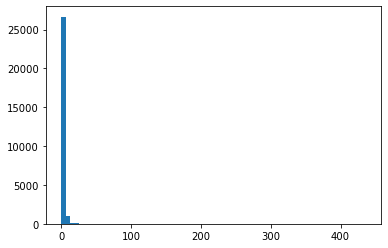

In [68]:
diff = np.abs(y_test - y_pred_RF)
import matplotlib.pyplot as plt
x=plt.hist(diff,bins=70)

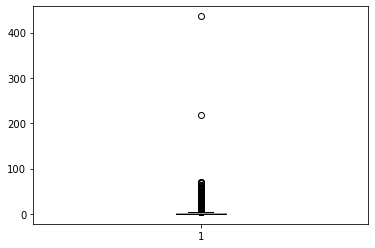

In [69]:
x=plt.boxplot(diff)